### Yeast Dataset

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

#Importing Yeast Dataset
dataset = pd.read_csv('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/classification-models/Yeast/data/yeast.data',sep='\s+')
data = pd.DataFrame(dataset)

X = data.iloc[:, 0:9].values
Y = data.iloc[:, -1].values
print(data)
print(X.shape)
print(Y.shape)

      ADT1_YEAST  0.58  0.61  0.47  0.13  0.50  0.00  0.48  0.22  MIT
0     ADT2_YEAST  0.43  0.67  0.48  0.27   0.5   0.0  0.53  0.22  MIT
1     ADT3_YEAST  0.64  0.62  0.49  0.15   0.5   0.0  0.53  0.22  MIT
2     AAR2_YEAST  0.58  0.44  0.57  0.13   0.5   0.0  0.54  0.22  NUC
3     AATM_YEAST  0.42  0.44  0.48  0.54   0.5   0.0  0.48  0.22  MIT
4     AATC_YEAST  0.51  0.40  0.56  0.17   0.5   0.5  0.49  0.22  CYT
...          ...   ...   ...   ...   ...   ...   ...   ...   ...  ...
1478  YUR1_YEAST  0.81  0.62  0.43  0.17   0.5   0.0  0.53  0.22  ME2
1479  ZIP1_YEAST  0.47  0.43  0.61  0.40   0.5   0.0  0.48  0.47  NUC
1480  ZNRP_YEAST  0.67  0.57  0.36  0.19   0.5   0.0  0.56  0.22  ME2
1481  ZUO1_YEAST  0.43  0.40  0.60  0.16   0.5   0.0  0.53  0.39  NUC
1482  G6PD_YEAST  0.65  0.54  0.54  0.13   0.5   0.0  0.53  0.22  CYT

[1483 rows x 10 columns]
(1483, 9)
(1483,)


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 10 columns):
ADT1_YEAST    1483 non-null object
0.58          1483 non-null float64
0.61          1483 non-null float64
0.47          1483 non-null float64
0.13          1483 non-null float64
0.50          1483 non-null float64
0.00          1483 non-null float64
0.48          1483 non-null float64
0.22          1483 non-null float64
MIT           1483 non-null object
dtypes: float64(8), object(2)
memory usage: 116.0+ KB


In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
Y = labelencoder.fit_transform(Y)
print(X)
print(Y)

[[32 0.43 0.67 ... 0.0 0.53 0.22]
 [33 0.64 0.62 ... 0.0 0.53 0.22]
 [2 0.58 0.44 ... 0.0 0.54 0.22]
 ...
 [1459 0.67 0.57 ... 0.0 0.56 0.22]
 [1460 0.43 0.4 ... 0.0 0.53 0.39]
 [354 0.65 0.54 ... 0.0 0.53 0.22]]
[6 6 7 ... 4 7 0]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

names = ['KNeighborsClassifier','SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB','MLPClassifier']
models = [KNeighborsClassifier(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_features = "auto")),
          LogisticRegression(),
          GaussianNB(),
          MLPClassifier()]

param_distributions = {
    'KNeighborsClassifier': {'n_neighbors': [5,10,20], 'metric':['minkowski','euclidean']},
    'SVC': {'kernel':['rbf', 'linear'], 'C': np.logspace(-1, 1, 3), 'gamma':np.logspace(0, 2, 3)},
    'DecisionTreeClassifier': {'criterion':['gini','entropy'], 'max_depth': range(1,20,2)},
    'RandomForestClassifier': {'n_estimators': [10, 50, 100, 200]},
    'AdaBoostClassifier': {'n_estimators': [50, 100, 200], 'learning_rate':[0.5,0.8,1],'base_estimator__criterion' : ['gini', 'entropy']},
    'LogisticRegression': {'max_iter':[100,130,140],'C': np.logspace(-2, 2, 5), 'solver':['saga','liblinear']},
    'GaussianNB': {},
    'MLPClassifier': {'hidden_layer_sizes': [(10,),(100,),(30,20)],'activation':['tanh', 'relu']}
}

accuracy= np.zeros(8)
for counter, model in enumerate(models):
    gridcv = GridSearchCV(model, param_distributions[names[counter]], n_jobs=4, cv=3)
    gridcv.fit(X_train, Y_train)
    grid_accuracy_test  = sklearn.metrics.accuracy_score(Y_test,  gridcv.best_estimator_.predict(X_test))
    accuracy[counter] = grid_accuracy_test*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy for KNeighborsClassifier: 57.55102040816327


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Accuracy for SVC: 57.55102040816327


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Accuracy for DecisionTreeClassifier: 56.12244897959183


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy for RandomForestClassifier: 63.6734693877551


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Accuracy for AdaBoostClassifier: 50.61224489795918


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for LogisticRegression: 58.97959183673469


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Accuracy for GaussianNB: 11.224489795918368
Accuracy for MLPClassifier: 61.63265306122449


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Statlog-German credit dataset models accuracy')

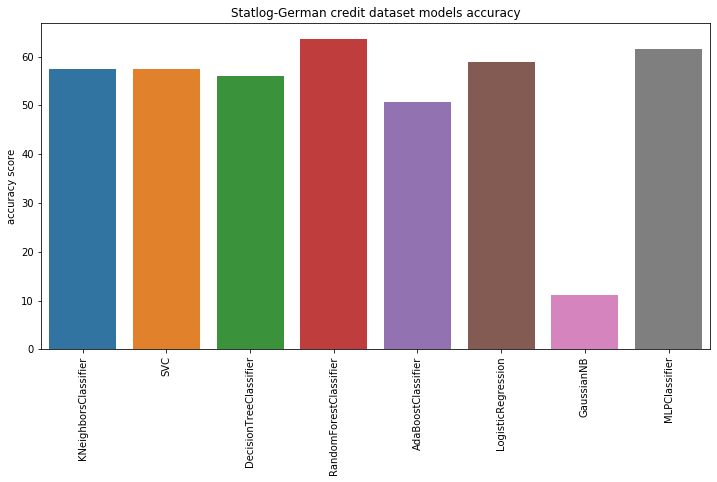

In [9]:
#Comparision graph between all models
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6],accuracy[7]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Statlog-German credit dataset models accuracy')